In [1]:
# read the path file with python
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
# import tensorflow as tf
# import tensorflow.keras as keras
import math
# from scipy.optimize import fsolve
# from scipy.optimize import root
from scipy.optimize import minimize
from scipy import signal
from scipy import linalg
import scipy as scipy
# import scipy as scp
# import sympy as  syp
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import Layer
# from tensorflow.keras.models import Sequential
import gc
import struct

In [2]:
class readpath(object):
    
    def __init__(self,N):
        self.N = N
        return None
    
    def generate_path(self):
        dict1 = {0:'C:\\Users\\Administrator\\source\\data\\path.dat',1:'data_1\\path8.dat'}
        self.dict1 = dict1
        return dict1
    
    def read0(self,i):
        q = 0
        with open(self.dict1[i], "rb") as file0:
            data1 = file0.read(4)
            I = struct.unpack("i", data1)[0]
            data1 = file0.read(4)
            J = struct.unpack("i", data1)[0]
            data1 = file0.read(4)
            K = struct.unpack("i", data1)[0]
            h = []
            for i in range(I):
                a = []
                for j in range(J):
                    l = []
                    while(1):
                        data1 = file0.read(4)
                        f = struct.unpack("4s",data1)[0]
                        if (f!=b'end\x00'):
                            f = struct.unpack("f",data1)[0]
                            l.append(f)
                        else:
                            break

                    a.append(l)
                h.append(a)
                
        return I, h
    
    def read1(self):
        self.generate_path()
        h = [None]*self.N
        I = np.zeros((self.N,))
        for i in range(0,self.N):
            I[i],h[i] = self.read0(i)
            
        self.h = h
        self.I = I
        return h,I
    


In [96]:
N = 1
s1 = readpath(N)
h,I = s1.read1()


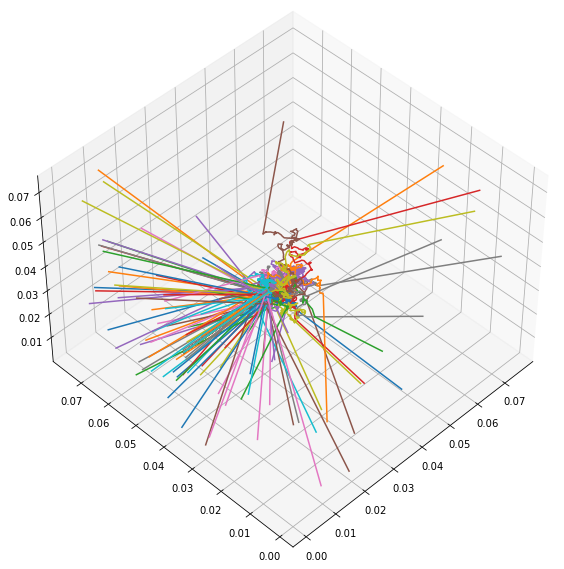

In [98]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
h1 = h[0]
k = 9000
l = 9500
for i in range(100):
    # Data for a three-dimensional line
    zline = h1[i][0]
    xline = h1[i][1]
    yline = h1[i][2]
    ax.view_init(45,225) # (0,90) (45,225)
    ax.plot3D(xline, yline, zline)
    
plt.axis('on')
plt.show()

In [175]:
def analysis(h,I):
    eye = [0.0375,0.055,0.0375]
    #normal line vector (0.707,0.707,0)
    #euqation of surface : x+y=0.09
    N=480
    time = np.linspace(1e-12, 480e-12, num=N)
    weight = np.zeros((N,))
    temp = pow(2,0.5)
    radius_fiber = 0.002
    threshold = 0.002
    for i in range(int(I)):
        for k in range(len(h[i][0])):

            if((pow(h[i][0][k]-eye[0],2)+pow(h[i][1][k]-eye[1],2)
               +pow(h[i][2][k]-eye[2],2) < pow(radius_fiber,2)) and 
               (abs(h[i][1][k]-eye[1])<threshold)):

                for t in range(N):
                    if(h[i][4][k]>=time[t]and(h[i][4][k]<time[t+1])):
                        weight[t]=weight[t]+h[i][3][k]
#                     break;

    return weight

def analysis_g(N, h, I):
    w2 = np.zeros((N,480))
    for i in range(0,N):
        w2[i] = analysis(h[i],I[i])

    return w2

In [176]:
w2 = analysis_g(N,h,I)

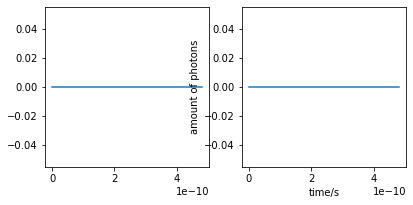

In [177]:
# plt.scatter(time,weight)
M=480
# N = 1
time = np.linspace(1e-12, 480e-12, num=M)
core = np.array([1,2,3,4,5,4,3,2,1])
core = core/np.sum(core)
plt.figure(figsize = (10,10))
for i in range(N):
    plt.subplot(3,3,i+1)
    plt.plot(time,w2[i])
#     plt.plot(np.convolve(w2[i],core, mode = 'same'))
plt.xlabel('time/s')
plt.ylabel('amount of photons')
plt.show()

In [ ]:
h1[]